## Juego de Navegacion en un Laberinto

In [3]:
# Librerias mecesarias para todo el ejercicio
import numpy as np
import matplotlib.pyplot as plt
import random

In [4]:
# Funcion para crear el laberinto
def crear_laberinto(tamanio, porcentaje_paredes=20, inicio=(0, 0), meta=None):
    laberinto = np.zeros((tamanio, tamanio))
    numero_paredes = int((tamanio * tamanio) * porcentaje_paredes / 100)

    # Ubicar paredes
    for pared in range(numero_paredes):
        x, y = random.randint(0, tamanio - 1), random.randint(0, tamanio - 1)

        # Cuidar que inicio y meta no sean paredes
        if (x, y) != inicio and (meta is None or (x, y) != meta):
            laberinto[x, y] = 1

    # Ubicar la meta
    if meta:
        laberinto[meta] = 9  # Representa la meta con 9
    else:
        # Ubicar la meta aleatoriamente si no esta especificada
        while True:
            x, y = random.randint(0, tamanio - 1), random.randint(0, tamanio - 1)
            if laberinto[x, y] == 0 and (x, y) != inicio:
                laberinto[x, y] = 9
                break
    return laberinto

In [5]:
# Funcion para visualizar el laberinto
def ver_laberinto(laberinto):
    plt.figure(figsize=(5, 5))
    plt.imshow(laberinto, cmap="hot", interpolation="nearest")
    plt.colorbar()

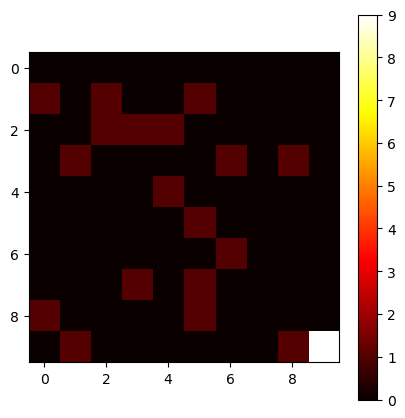

In [6]:
# Ejemplo de crear y mostrar laberintos
laberinto = crear_laberinto(10, 20, inicio=(0, 0), meta=(9, 9))
ver_laberinto(laberinto)

In [7]:
# Parametros para el algoritmo Q-Learning
alpha = 0.1
gamma = 0.99
epsilon = 0.1
num_episodios = 500

In [8]:
# Funcion para elegir acciones equilibrando entre explotacion y exploracion
def epsilon_codicioso(Q, estado, tamanio_estado):
    if random.uniform(0,1) < epsilon:
        return random.randint(0,3)
    else:
        return np.argmax(Q[(estado)])

In [9]:
# Funcion para simular la accion en el laberinto
def ejecutar_accion(estado, accion, laberinto, tamanio):
    fila, columna = divmod(estado, tamanio)
    if accion == 0 and fila > 0:
        fila -= 1
    elif accion == 1 and fila < tamanio - 1:
        fila += 1
    elif accion == 2 and columna > 0:
        columna -= 1
    elif accion == 3 and columna > tamanio - 1:
        columna += 1

    siguiente_estado = fila * tamanio + columna
    if laberinto[fila, columna] == 1:
        recompensa = -100
        siguiente_estado = estado
        terminado = False
    elif laberinto[fila, columna] == 9:
        recompensa = 100
        terminado = True
    else:
        recompensa = -1
        terminado = False
    return siguiente_estado, recompensa, terminado

In [43]:
# Funcion principal para ejecutar el algoritmo Q-Learning
def q_learning(laberinto, tamanio, inicio, meta):
    Q = np.zeros((tamanio * tamanio, 4))
    for episodio in range(num_episodios):   
        estado = inicio
        terminado = False
        pase = 0

        while not terminado and pase < num_episodios:
            accion = epsilon_codicioso(Q, estado, tamanio)
            siguiente_estado, recompensa, terminado = ejecutar_accion(estado, accion, laberinto, tamanio)
            Q[estado, accion] += alpha * (recompensa + gamma * max(Q[siguiente_estado]) - Q[estado, accion])
            estado = siguiente_estado
            pase += 1
    return Q

In [44]:
# Funcion para convertir cooredenadas a indice general
def indice_general(posicion, tamanio):
    return posicion[0] * tamanio + posicion[1]

In [45]:
# Inciar el laberinto y configurar el algoritmo Q-Learning
tamanio = 10
posicion_inicio = (0, 0)
posicion_meta = (9, 9)
laberinto = crear_laberinto(tamanio, 20, inicio=posicion_inicio, meta=posicion_meta)
inicio = indice_general(posicion_inicio, tamanio)
meta = indice_general(posicion_meta, tamanio)
valores_Q = q_learning(laberinto, tamanio, inicio, meta)

In [46]:
# Funcion para mostrar el aprendizaje del agente
def mostrar_aprendizaje(laberinto, Q, inicio, meta, tamanio):
    fila, columna = divmod(inicio, tamanio)
    ruta = [(fila, columna)]
    estado = inicio
    while estado != meta:
        accion = np.argmax(Q[estado])
        estado, _, _ = ejecutar_accion(estado, accion, laberinto, tamanio)
        fila, columna = divmod(estado, tamanio)
        ruta.append((fila, columna))

    # Mostrar el camnino recorrido
    plt.figure(figsize=(5, 5))
    plt.imshow(laberinto, cmap="hot", interpolation="nearest")
    filas, columnas = zip(*ruta)
    plt.plot(columnas, filas, maker="o", color="c")
    plt.colorbar()

In [47]:
mostrar_aprendizaje(laberinto, valores_Q, inicio, meta, tamanio)

KeyboardInterrupt: 